In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
pd.options.display.max_colwidth = 200
%matplotlib inline

In [3]:
df = pd.read_csv('../Projek UTS PBA_A_JAWA KRAMA LUGU/data/train_preprocess.csv')
df.head()

,original,translated,fuel,machine,others,part,price,service
0,Saya memakai Honda Jazz GK5 tahun 2014 ( pertama meluncur ) . Mobil nya bagus dan enak sesuai moto nya menyenangkan untuk dikendarai,kula ngangge honda jazz GK5 warsa 2014 ( pertami ngluncur ) . mobilipun sae lan eca cocog motonipun ngremenaken kangge dikendarai,neutral,neutral,positive,neutral,neutral,neutral
1,Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setengah saja .,avanza kenging punapa dados boros bensin kados puniki empun ah. enggal dipunisi sampun badhe sapalih mawon .,negative,neutral,neutral,neutral,neutral,neutral
2,"saran ku dan pengalaman ku , mending beli mobil niaga L300 atau canter . irit dan bandel .","saran kula lan pengalaman kula , mending tumbas mobil niaga l300 utawi canter . irit lan bandel .",positive,positive,neutral,neutral,neutral,neutral
3,Dari segi harga juga pajero lebih mahal 30 jutaan dibanding fortuner,saking segi regi ugi pajero langkung awis 30 jutaan dipunbanding fortuner,neutral,neutral,neutral,neutral,positive,neutral
4,Kalo menurut gw enak pajero si,menawi midherek gw eca pajero si,neutral,neutral,positive,neutral,neutral,neutral


In [4]:
stemmer = StemmerFactory().create_stemmer()
wpt = nltk.WordPunctTokenizer()
stopword_factory = StopWordRemoverFactory()

def uncapitalize(doc):
    return doc.lower()
def normalize_document(doc):
    doc = uncapitalize(doc)
    doc = re.sub(r"[^a-zA-Z\s]", "", doc, re.I | re.A)
    doc = doc.strip()
    doc = wpt.tokenize(doc)
    doc = [stemmer.stem(word) for word in doc]
    doc = " ".join(doc)
    return doc
normalize_corpus = np.vectorize(normalize_document)

In [5]:
norm_corpus = normalize_corpus(list(df['translated']))
# save to csv
df['clean_sentence'] = norm_corpus
df.to_csv('../Projek UTS PBA_A_JAWA KRAMA LUGU/Feature Engineering/train_preprocess_stemmed.csv', index=False)
df.head()

,original,translated,fuel,machine,others,part,price,service,clean_sentence
0,Saya memakai Honda Jazz GK5 tahun 2014 ( pertama meluncur ) . Mobil nya bagus dan enak sesuai moto nya menyenangkan untuk dikendarai,kula ngangge honda jazz GK5 warsa 2014 ( pertami ngluncur ) . mobilipun sae lan eca cocog motonipun ngremenaken kangge dikendarai,neutral,neutral,positive,neutral,neutral,neutral,kula ngangge honda jazz gk warsa tam ngluncur mobil sae lan eca cocog motonipun ngremenaken kangge kendara
1,Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setengah saja .,avanza kenging punapa dados boros bensin kados puniki empun ah. enggal dipunisi sampun badhe sapalih mawon .,negative,neutral,neutral,neutral,neutral,neutral,avanza kenging punapa dados boros bensin kados puniki empun ah enggal dipunisi sampun badhe sapalih mawon
2,"saran ku dan pengalaman ku , mending beli mobil niaga L300 atau canter . irit dan bandel .","saran kula lan pengalaman kula , mending tumbas mobil niaga l300 utawi canter . irit lan bandel .",positive,positive,neutral,neutral,neutral,neutral,saran kula lan alam kula mending tumbas mobil niaga l utawi canter irit lan bandel
3,Dari segi harga juga pajero lebih mahal 30 jutaan dibanding fortuner,saking segi regi ugi pajero langkung awis 30 jutaan dipunbanding fortuner,neutral,neutral,neutral,neutral,positive,neutral,saking segi regi ugi pajero langkung awis juta dipunbanding fortuner
4,Kalo menurut gw enak pajero si,menawi midherek gw eca pajero si,neutral,neutral,positive,neutral,neutral,neutral,menawi midherek gw eca pajero si


In [6]:
df['clean_sentence'] = norm_corpus

df.head()

,original,translated,fuel,machine,others,part,price,service,clean_sentence
0,Saya memakai Honda Jazz GK5 tahun 2014 ( pertama meluncur ) . Mobil nya bagus dan enak sesuai moto nya menyenangkan untuk dikendarai,kula ngangge honda jazz GK5 warsa 2014 ( pertami ngluncur ) . mobilipun sae lan eca cocog motonipun ngremenaken kangge dikendarai,neutral,neutral,positive,neutral,neutral,neutral,kula ngangge honda jazz gk warsa tam ngluncur mobil sae lan eca cocog motonipun ngremenaken kangge kendara
1,Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setengah saja .,avanza kenging punapa dados boros bensin kados puniki empun ah. enggal dipunisi sampun badhe sapalih mawon .,negative,neutral,neutral,neutral,neutral,neutral,avanza kenging punapa dados boros bensin kados puniki empun ah enggal dipunisi sampun badhe sapalih mawon
2,"saran ku dan pengalaman ku , mending beli mobil niaga L300 atau canter . irit dan bandel .","saran kula lan pengalaman kula , mending tumbas mobil niaga l300 utawi canter . irit lan bandel .",positive,positive,neutral,neutral,neutral,neutral,saran kula lan alam kula mending tumbas mobil niaga l utawi canter irit lan bandel
3,Dari segi harga juga pajero lebih mahal 30 jutaan dibanding fortuner,saking segi regi ugi pajero langkung awis 30 jutaan dipunbanding fortuner,neutral,neutral,neutral,neutral,positive,neutral,saking segi regi ugi pajero langkung awis juta dipunbanding fortuner
4,Kalo menurut gw enak pajero si,menawi midherek gw eca pajero si,neutral,neutral,positive,neutral,neutral,neutral,menawi midherek gw eca pajero si


In [7]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(df['clean_sentence'])
cv_matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 9765 stored elements and shape (810, 1728)>

In [8]:
print(cv_matrix)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 9765 stored elements and shape (810, 1728)>
  Coords	Values
  (0, 779)	1
  (0, 1030)	1
  (0, 539)	1
  (0, 608)	1
  (0, 490)	1
  (0, 1685)	1
  (0, 1536)	1
  (0, 1059)	1
  (0, 965)	1
  (0, 1330)	1
  (0, 795)	1
  (0, 400)	1
  (0, 264)	1
  (0, 978)	1
  (0, 1063)	1
  (0, 663)	1
  (0, 721)	1
  (1, 102)	1
  (1, 722)	1
  (1, 1244)	1
  (1, 287)	1
  (1, 209)	1
  (1, 168)	1
  (1, 635)	1
  (1, 1251)	1
  :	:
  (807, 1066)	1
  (808, 795)	1
  (808, 663)	1
  (808, 576)	1
  (808, 1286)	1
  (808, 979)	1
  (808, 563)	1
  (808, 559)	1
  (808, 1459)	1
  (808, 1094)	1
  (808, 811)	1
  (808, 593)	1
  (808, 125)	1
  (808, 1662)	1
  (808, 336)	1
  (808, 181)	1
  (808, 1328)	1
  (808, 1055)	1
  (808, 903)	1
  (808, 486)	1
  (809, 1285)	1
  (809, 563)	1
  (809, 244)	1
  (809, 655)	1
  (809, 407)	1


In [9]:
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
vocab = cv.get_feature_names_out()
pd.DataFrame(cv_matrix, columns=vocab)

,abal,abang,abangabang,aben,abis,abs,ac,accu,aci,ada,...,yakin,yamaha,yamahaid,yamahaindonesia,yang,yangg,ymh,yogyakarta,yuta,zr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(df['clean_sentence'])

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names_out()
pd.DataFrame(bv_matrix, columns=vocab)

,abal ing,abang kula,abangabang minggah,aben menda,abis hehe,abis menawi,abs keren,ac asrep,ac ipun,ac mboten,...,yang terjal,yangg sampun,ymh awat,yogyakarta lan,yuta angsal,yuta juli,yuta mboten,yuta rupiyah,yuta saya,zr sanes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
tt = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)

tt_matrix = tt.fit_transform(cv_matrix)
tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names_out()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,abal,abang,abangabang,aben,abis,abs,ac,accu,aci,ada,...,yakin,yamaha,yamahaid,yamahaindonesia,yang,yangg,ymh,yogyakarta,yuta,zr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2', use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(df['clean_sentence'])
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,abal,abang,abangabang,aben,abis,abs,ac,accu,aci,ada,...,yakin,yamaha,yamahaid,yamahaindonesia,yang,yangg,ymh,yogyakarta,yuta,zr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
unique_words = list(
set([word for doc in [doc.split() for doc in df['clean_sentence']] for word in doc])
)

# Create dictionary with unique words as keys, initialized to 0
def_feature_dict = {w: 0 for w in unique_words}
print(def_feature_dict)

{'agustus': 0, 'indah': 0, 'warniwarni': 0, 'nomor': 0, 'dipundandosi': 0, 'pajeng': 0, 'kalawau': 0, 'sapalih': 0, 'rupiyah': 0, 'new': 0, 'power': 0, 'aspal': 0, 'damelan': 0, 'edukasi': 0, 'tandinganipun': 0, 'fasilitas': 0, 'mitshubisi': 0, 'alesanipun': 0, 'niaga': 0, 'griya': 0, 'rapi': 0, 'lincah': 0, 'modern': 0, 'terlalu': 0, 'astra': 0, 'yuta': 0, 'sanes': 0, 'manuver': 0, 'sapinten': 0, 'panjang': 0, 'nonresmi': 0, 'kesagahan': 0, 'pejahaken': 0, 'andhaping': 0, 'abangabang': 0, 'unit': 0, 'sinten': 0, 'ngutamikaken': 0, 'aneh': 0, 'test': 0, 'kuwawi': 0, 'ngelitikipun': 0, 'taksi': 0, 'enggal': 0, 'sisingamangaraja': 0, 'thanks': 0, 'otr': 0, 'limbung': 0, 'kasil': 0, 'gps': 0, 'rem': 0, 'daihatsuind': 0, 'nasional': 0, 'low': 0, 'dipunraos': 0, 'teknisi': 0, 'wingking': 0, 'reviewipun': 0, 'jaman': 0, 'sukucadangipun': 0, 'motonipun': 0, 'sampeyansampeyan': 0, 'ckd': 0, 'kurang': 0, 'cantik': 0, 'auto': 0, 'umur': 0, 'dll': 0, 'enem': 0, 'beres': 0, 'spion': 0, 'terus': 0,

In [15]:
from collections import Counter

bow_features = []

for doc in df['clean_sentence']:
    bow_feature = Counter(doc.split())
    all_features = Counter(def_feature_dict)
    bow_feature.update(all_features)
    bow_features.append(bow_feature)
    
bow_features = pd.DataFrame(bow_features)
bow_features

,kula,ngangge,honda,jazz,gk,warsa,tam,ngluncur,mobil,sae,...,deket,konsumsi,pelayananipun,generasi,handlingipun,sayuta,santai,pis,saleresipun,kaken
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
import scipy.sparse as sp
feature_names = list(bow_features.columns)

df_bow = np.diff(sp.csc_matrix(bow_features, dtype=int).indptr)
df_bow = 1 + df_bow

# show smoothened version of document frequencies
pd.DataFrame([df_bow], columns=feature_names)

,kula,ngangge,honda,jazz,gk,warsa,tam,ngluncur,mobil,sae,...,deket,konsumsi,pelayananipun,generasi,handlingipun,sayuta,santai,pis,saleresipun,kaken
0,216,16,92,15,3,41,6,2,157,74,...,3,14,6,3,2,2,2,7,3,4


In [17]:
#compute inverse document frequency
total_docs = 1 + len(df['clean_sentence'])

print(total_docs)

total_docs_float = float(total_docs)

idf = 1.0 + np.log(float(total_docs_float)/ df_bow)

print(idf)
# show smoothened version of idf
pd.DataFrame([np.round(idf, 2)], columns=feature_names)

811
[2.32298965 4.92567933 3.17647948 ... 5.75235791 6.59965577 6.31197369]


,kula,ngangge,honda,jazz,gk,warsa,tam,ngluncur,mobil,sae,...,deket,konsumsi,pelayananipun,generasi,handlingipun,sayuta,santai,pis,saleresipun,kaken
0,2.32,4.93,3.18,4.99,6.6,3.98,5.91,7.01,2.64,3.39,...,6.6,5.06,5.91,6.6,7.01,7.01,7.01,5.75,6.6,6.31


In [18]:
# compute idf diagonal matrix
total_features = bow_features.shape[1]
idf_diag = sp.spdiags(idf, diags=0, m=total_features, n=total_features)
idf_dense = idf_diag.todense()

#print the idf diagonal matrix
pd.DataFrame(np.round(idf_dense, 2))

,0,1,2,3,4,5,6,7,8,9,...,1729,1730,1731,1732,1733,1734,1735,1736,1737,1738
0,2.32,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00
1,0.00,4.93,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00
2,0.00,0.00,3.18,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00
3,0.00,0.00,0.00,4.99,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00
4,0.00,0.00,0.00,0.00,6.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.01,0.00,0.00,0.0,0.00
1735,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,7.01,0.00,0.0,0.00
1736,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,5.75,0.0,0.00
1737,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,6.6,0.00


In [19]:
# compute tfidf feature matrix
tf = np.array(bow_features, dtype='float64')
tfidf = tf * idf
#view raw tfidf feature matrix
pd.DataFrame(np.round(tfidf, 2), columns=feature_names)

,kula,ngangge,honda,jazz,gk,warsa,tam,ngluncur,mobil,sae,...,deket,konsumsi,pelayananipun,generasi,handlingipun,sayuta,santai,pis,saleresipun,kaken
0,2.32,4.93,3.18,4.99,6.6,3.98,5.91,7.01,2.64,3.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.65,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2.64,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
808,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from numpy.linalg import norm
# compute L2 norms
norms = norm(tfidf, axis=1)

#print norms for each document
print (np.round(norms, 3))

[20.08  18.78  18.867 13.208 11.412 17.941 17.223 11.772 19.482 21.389
 24.992 15.085 13.663 17.433 29.775 13.102 18.138 28.289 21.523 13.491
 15.054 19.349 20.022 13.445 19.132 14.335  8.571 13.26   8.221 23.088
 12.053 20.486 15.734 16.072  8.833 10.594 16.327 27.612 16.455 16.143
 17.886 12.945 15.526 12.287 18.457 21.213 18.314 12.389 22.627 13.552
 15.112 18.838 29.487 25.589 16.716 21.19  23.14  21.402 18.612 10.29
 19.444 25.568 19.385 21.573 28.307 34.946 20.547 16.003 15.547 22.224
 19.927  9.368 15.052  8.321 19.927 18.784 21.215 26.791 18.734 22.302
 13.016 20.997 18.641 18.466 15.522 21.599 13.772 12.764  8.777 23.763
 12.308 17.022 23.832 12.359 15.268 19.492 13.111 12.19  16.726 15.49
 30.906 13.911 25.389 25.76  19.828 19.686 18.755 14.761 17.599 26.913
 11.058 14.467 25.827 17.665 25.021 17.98  12.261 24.415 12.309 15.317
 15.346 15.543 12.583 13.049 16.311 29.386 15.724 10.313 15.735 20.126
 22.689 14.029  8.713 11.641 12.739 18.973 19.909 13.526 19.811 19.678
 21.261 

In [21]:
norm_tfidf = tfidf / norms[:, None]

# show final tfidf feature matrix
pd.DataFrame(np.round(norm_tfidf, 2), columns=feature_names)

,kula,ngangge,honda,jazz,gk,warsa,tam,ngluncur,mobil,sae,...,deket,konsumsi,pelayananipun,generasi,handlingipun,sayuta,santai,pis,saleresipun,kaken
0,0.12,0.25,0.16,0.25,0.33,0.2,0.29,0.35,0.13,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.25,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.14,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
808,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
new_df = pd.read_csv('../Projek UTS PBA_A_JAWA KRAMA LUGU/data/test_preprocess.csv')
new_df.head()

,original,translated,fuel,machine,others,part,price,service
0,Terios paling gagah . Apalagi warna merah metalic !,Terios ingkang paling gagah. Luwih-luwih warna abrit metalik !,neutral,neutral,positive,positive,neutral,neutral
1,"gue pakai mobilio . menurut gue , bener fun to drive , enak dipakai nya .","Kula ngginakaken Mobilio . Miturut kula , saestu nyenengake kanggé nyopir , lan kepenak kanggé dipun-ginakaken",neutral,neutral,positive,neutral,neutral,neutral
2,ya walaupun memiliki desain sporty kalau tingkat kenyamanan mobil berkurang juga berkurang kan,"Inggih, sanajan gadhah desain sporty, menawi tingkat kepenakaning mobil suda, mesthi kemawon dados suda ugi.",neutral,neutral,negative,positive,neutral,neutral
3,Xpander laku keras di pasar Indonesia .,Xpander payu sanget ing pasar Indonesia .,neutral,neutral,positive,neutral,neutral,neutral
4,"Kalau mau segala enak pakai Avanza saja , mas .","Menawi kepengin sedaya kepenak, ngginakaken Avanza mawon, mas .",neutral,neutral,positive,neutral,neutral,neutral


In [23]:
norm_corpus = normalize_corpus(list(new_df['translated']))

new_df['clean_sentence'] = norm_corpus

new_df.head()

,original,translated,fuel,machine,others,part,price,service,clean_sentence
0,Terios paling gagah . Apalagi warna merah metalic !,Terios ingkang paling gagah. Luwih-luwih warna abrit metalik !,neutral,neutral,positive,positive,neutral,neutral,terios ingkang paling gagah luwihluwih warna abrit metalik
1,"gue pakai mobilio . menurut gue , bener fun to drive , enak dipakai nya .","Kula ngginakaken Mobilio . Miturut kula , saestu nyenengake kanggé nyopir , lan kepenak kanggé dipun-ginakaken",neutral,neutral,positive,neutral,neutral,neutral,kula ngginakaken mobilio miturut kula saestu nyenengake kangg nyopir lan penak kangg dipunginakaken
2,ya walaupun memiliki desain sporty kalau tingkat kenyamanan mobil berkurang juga berkurang kan,"Inggih, sanajan gadhah desain sporty, menawi tingkat kepenakaning mobil suda, mesthi kemawon dados suda ugi.",neutral,neutral,negative,positive,neutral,neutral,inggih sanajan gadhah desain sporty menawi tingkat kepenakaning mobil suda mesthi mawon dados suda ugi
3,Xpander laku keras di pasar Indonesia .,Xpander payu sanget ing pasar Indonesia .,neutral,neutral,positive,neutral,neutral,neutral,xpander payu sanget ing pasar indonesia
4,"Kalau mau segala enak pakai Avanza saja , mas .","Menawi kepengin sedaya kepenak, ngginakaken Avanza mawon, mas .",neutral,neutral,positive,neutral,neutral,neutral,menawi pengin daya penak ngginakaken avanza mawon mas


In [24]:
pd.DataFrame(np.round(tv.transform(new_df['clean_sentence']).toarray(), 2), columns=tv.get_feature_names_out())

,abal,abang,abangabang,aben,abis,abs,ac,accu,aci,ada,...,yakin,yamaha,yamahaid,yamahaindonesia,yang,yangg,ymh,yogyakarta,yuta,zr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

# Create and configure tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_sentence'])
word2id = tokenizer.word_index

# Add padding token
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}

# Convert texts to sequences
wids = [[word2id[w] for w in text.split()]
        for text in df['clean_sentence']]

# Define model parameters
vocab_size = len(word2id)
embed_size = 100
window_size = 2

# Print vocabulary info
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

ImportError: cannot import name 'float8_e4m3b11fnuz' from 'tensorflow.python.framework.dtypes' (C:\Users\Dylan Ethan\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\framework\dtypes.py)

In [ ]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size * 2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word = []
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append(
                [
                words[i]
                for i in range(start, end)
                if 0 <= i < sentence_length and i != index
                ]
            )
            label_word.append(word)
            
            x = pad_sequences(context_words, maxlen=context_length)
            y = to_categorical(label_word, vocab_size)
            yield (x, y)

In [ ]:
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
        
        if i == 10:
            break
        i += 1

Context (X): ['kula', 'ngangge', 'jazz', 'gk'] -> Target (Y): honda
Context (X): ['ngangge', 'honda', 'gk', 'warsa'] -> Target (Y): jazz
Context (X): ['honda', 'jazz', 'warsa', 'tam'] -> Target (Y): gk
Context (X): ['jazz', 'gk', 'tam', 'ngluncur'] -> Target (Y): warsa
Context (X): ['gk', 'warsa', 'ngluncur', 'mobil'] -> Target (Y): tam
Context (X): ['warsa', 'tam', 'mobil', 'sae'] -> Target (Y): ngluncur
Context (X): ['tam', 'ngluncur', 'sae', 'lan'] -> Target (Y): mobil
Context (X): ['ngluncur', 'mobil', 'lan', 'eca'] -> Target (Y): sae
Context (X): ['mobil', 'sae', 'eca', 'cocog'] -> Target (Y): lan
Context (X): ['sae', 'lan', 'cocog', 'motonipun'] -> Target (Y): eca
Context (X): ['lan', 'eca', 'motonipun', 'ngremenaken'] -> Target (Y): cocog


In [ ]:
import tensorflow as tf

import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
# tensor version 

print (tf.__version__)

print(vocab_size, embed_size, window_size)

# Configure GPU memory growth
def configure_gpu():
    try:
        # List physical devices
        physical_devices = tf.config.list_physical_devices("GPU")

        if physical_devices:
            for device in physical_devices:
                # Enable memory growth for all GPUs
                tf.config.experimental.set_memory_growth(device, True)
                print(f"Memory growth enabled for GPU: {device}")

            # Optional: Set memory limit
            # tf.config.set_logical_device_configuration(
            #     physical_devices[0],
            #     [tf.config.LogicalDeviceConfiguration(memory_limit=4096)]
            # )
    except Exception as e:
        print(f"GPU configuration error: {e}")
        print("Falling back to CPU")


# Call before creating any models
configure_gpu()

# cbow = Sequential()
# cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size * 2))
# cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
# cbow.add(Dense(vocab_size, activation='softmax'))

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=(window_size * 2)),
    Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)),
    Dense(vocab_size, activation='softmax')
])

model.build(input_shape=(None, window_size * 2))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# Display model architecture summary
model.summary()

2.15.1
1740 100 2


2025-04-27 16:26:26.354355: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 100)            174000    
                                                                 
 lambda (Lambda)             (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1740)              175740    
                                                                 
Total params: 349740 (1.33 MB)
Trainable params: 349740 (1.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += model.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

Epoch: 1 	Loss: 70073.48725581169

Epoch: 2 	Loss: 67807.9226706028

Epoch: 3 	Loss: 68181.6018524766

Epoch: 4 	Loss: 68416.25141853094

Epoch: 5 	Loss: 68536.9482036233



In [ ]:
weights = model.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

(1739, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ingkang,-0.000305,-0.141730,0.054930,0.138128,-0.152689,0.256081,0.131395,0.166290,0.024393,0.413336,...,0.528291,-0.042737,-0.342626,0.780938,0.030380,-0.061254,-0.146347,0.382012,0.288259,-0.341874
lan,-0.237946,-0.083330,0.064778,0.022817,0.036874,0.026381,0.062593,0.128419,0.092444,-0.049196,...,0.125615,-0.103191,-0.187060,0.280163,-0.089915,0.150209,-0.160544,-0.402370,0.065780,0.189175
sanget,0.010765,-0.242419,-0.243416,0.175463,-0.383249,0.005586,-0.122516,0.151925,0.144329,-0.169222,...,0.113817,0.075410,-0.132095,-0.697867,-0.118645,-0.094564,-0.258453,0.428190,0.097734,0.181738
mobil,-0.000910,0.340409,-0.139156,0.131322,-0.193151,-0.085293,0.028672,0.073097,-0.018668,-0.218343,...,0.105265,0.048060,-0.019061,-0.104730,-0.126207,0.039645,-0.085065,0.748747,-0.087719,-0.145829
mboten,0.246940,0.369126,0.101492,-0.000287,-0.128548,-0.003873,0.269335,-0.064599,-0.072539,0.370582,...,0.285661,-0.022409,0.114683,0.133728,0.104685,-0.084878,0.195711,0.433595,0.051588,0.080262


In [ ]:
from gensim.models import Word2Vec
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
df = pd.read_csv("../Projek UTS PBA_A_JAWA KRAMA LUGU/Feature Engineering/train_preprocess_stemmed.csv")
tokenized_corpus = [wpt.tokenize(document) for document in df["clean_sentence"]]
print(tokenized_corpus)

# Set values for various parameters
feature_size = 1000
window_context = 30  # Context window size
min_word_count = 1  # Minimum word count
sample = 1e-3

w2v_model = Word2Vec(
    sentences=tokenized_corpus,  # Named parameter for input
    vector_size=feature_size,  # Vector dimensionality
    window=window_context,  # Context window
    min_count=min_word_count,  # Min word count
    sample=sample,  # Downsampling
    workers=8,  # Number of threads
)

# view similar words based on gensim's model
similar_words = {
    search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
    for search_term in [
        "avanza",
        "mobil",
        "toyota",
        "sae",
        "kijang",
    ]
}
similar_words

[['kula', 'ngangge', 'honda', 'jazz', 'gk', 'warsa', 'tam', 'ngluncur', 'mobil', 'sae', 'lan', 'eca', 'cocog', 'motonipun', 'ngremenaken', 'kangge', 'kendara'], ['avanza', 'kenging', 'punapa', 'dados', 'boros', 'bensin', 'kados', 'puniki', 'empun', 'ah', 'enggal', 'dipunisi', 'sampun', 'badhe', 'sapalih', 'mawon'], ['saran', 'kula', 'lan', 'alam', 'kula', 'mending', 'tumbas', 'mobil', 'niaga', 'l', 'utawi', 'canter', 'irit', 'lan', 'bandel'], ['saking', 'segi', 'regi', 'ugi', 'pajero', 'langkung', 'awis', 'juta', 'dipunbanding', 'fortuner'], ['menawi', 'midherek', 'gw', 'eca', 'pajero', 'si'], ['ch', 'r', 'versi', 'nagari', 'puniki', 'kirang', 'yakin', 'soal', 'fitur', 'lan', 'kajangkepan'], ['linaradj', 'kapankapan', 'cobi', 'bengkel', 'daihatsu', 'piyambakipun', 'daya', 'badhe', 'koh', 'servis', 'langkung', 'sae'], ['mending', 'confero', 'reginipun', 'langkung', 'mirah', 'daripada', 'formo'], ['menawi', 'soal', 'servis', 'mending', 'pilih', 'grand', 'livina', 'soal', 'after', 'sales'

{'avanza': ['ingkang', 'lan', 'kula', 'sanget', 'ing'],
 'mobil': ['lan', 'sanget', 'ingkang', 'kula', 'ing'],
 'toyota': ['ingkang', 'lan', 'kula', 'ing', 'sanget'],
 'sae': ['ingkang', 'lan', 'ing', 'sanget', 'kula'],
 'kijang': ['indonesia', 'keluwargi', 'pajero', 'badhe', 'awis']}

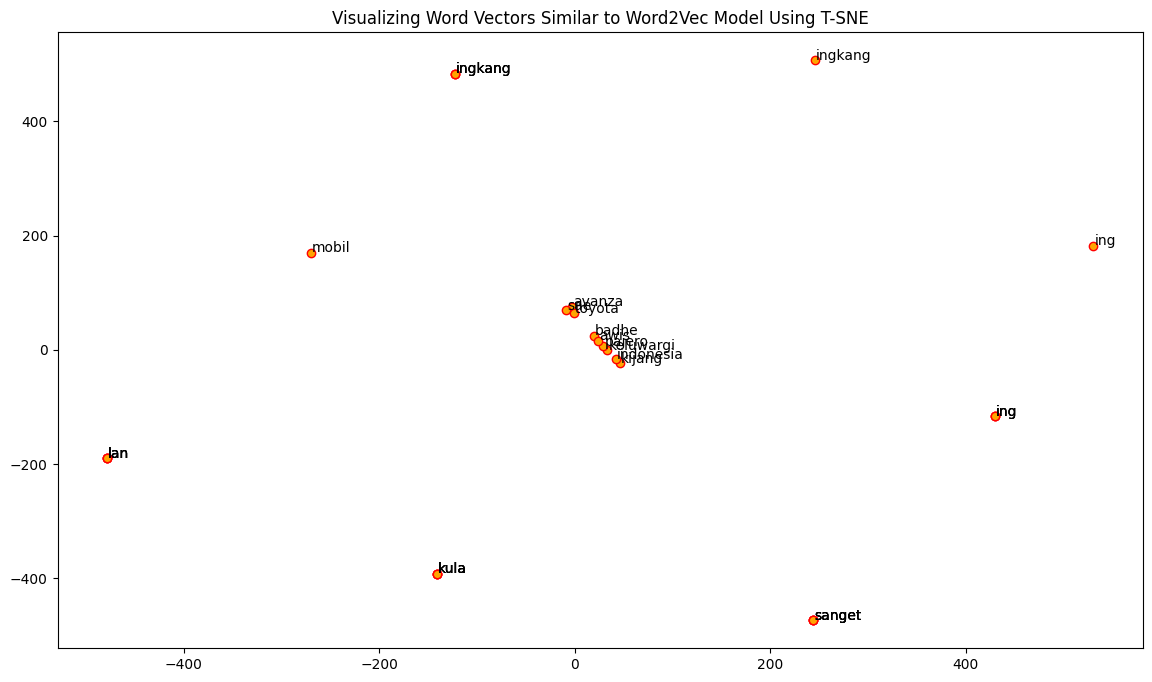

In [ ]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.title("Visualizing Word Vectors Similar to Word2Vec Model Using T-SNE")
plt.scatter(T[:, 0], T[:, 1], c="orange", edgecolors="r")
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x + 1, y + 1), xytext=(0, 0), textcoords="offset points")


In [ ]:
w2v_model.wv["avanza"]

array([ 0.13522112,  0.05521992,  0.05116025,  0.07242513, -0.0533681 ,
        0.01362608,  0.02846815,  0.07396042, -0.00640837,  0.05168655,
        0.0206184 ,  0.00971822,  0.00703776,  0.04761479,  0.09497892,
       -0.02057573, -0.06044252, -0.01561299,  0.04340423, -0.16154005,
        0.0421116 , -0.09480178, -0.02697341, -0.01376822,  0.03591064,
       -0.04759976,  0.08203018, -0.03736386, -0.20791747,  0.06277462,
        0.09377971, -0.05873923, -0.03027416, -0.05790417,  0.09345916,
       -0.05118466,  0.08272787,  0.05485884, -0.01256727, -0.12876621,
       -0.02482478,  0.04379333, -0.10241582,  0.13592505, -0.01392326,
       -0.01421825, -0.08519186,  0.07620648, -0.08434666,  0.07296132,
       -0.00392258, -0.02735787, -0.0162857 , -0.09461156,  0.0179392 ,
       -0.01077372,  0.07874694, -0.02243834, -0.06126817, -0.0402394 ,
       -0.05647246,  0.01946685, -0.11082581,  0.02271547, -0.02577325,
        0.0587138 ,  0.00128852,  0.1326568 ,  0.02379354, -0.00

In [ ]:
import spacy
## instll tar.gz 
 
glove_file = open("../Projek UTS PBA_A_JAWA KRAMA LUGU/Feature Engineering/glove.6B.100d.txt", "r", encoding="utf-8")
embedding_index = dict()

for line in glove_file:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embedding_index[word] = coefs
    
glove_file.close()
print("Found %s word vectors." % len(embedding_index))

# create embedding matrix
embeddiing_matrix = np.zeros((len(word2id) + 1, embed_size))
for word, i in word2id.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embeddiing_matrix[i] = embedding_vector
print(embeddiing_matrix.shape)

Found 182431 word vectors.
(1741, 100)


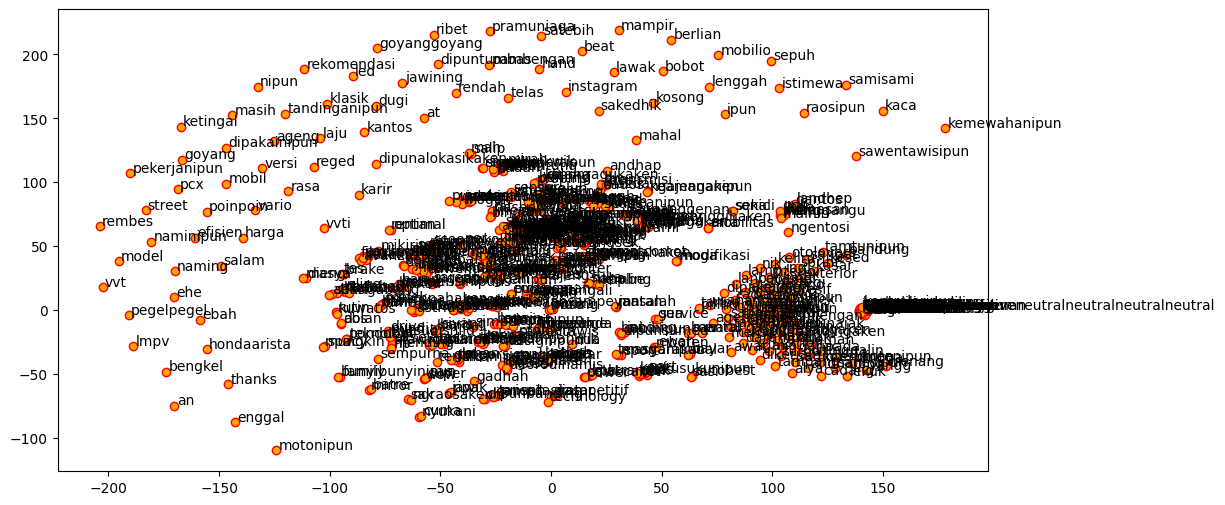

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(embeddiing_matrix[1:])
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c="orange", edgecolors="r")
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x + 1, y + 1), xytext=(0, 0), textcoords="offset points")

,original,translated,fuel,machine,others,part,price,service,clean_sentence,ClusterLabel
0,Saya memakai Honda Jazz GK5 tahun 2014 ( pertama meluncur ) . Mobil nya bagus dan enak sesuai moto nya menyenangkan untuk dikendarai,kula ngangge honda jazz GK5 warsa 2014 ( pertami ngluncur ) . mobilipun sae lan eca cocog motonipun ngremenaken kangge dikendarai,neutral,neutral,positive,neutral,neutral,neutral,kula ngangge honda jazz gk warsa tam ngluncur mobil sae lan eca cocog motonipun ngremenaken kangge kendara,2
1,Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setengah saja .,avanza kenging punapa dados boros bensin kados puniki empun ah. enggal dipunisi sampun badhe sapalih mawon .,negative,neutral,neutral,neutral,neutral,neutral,avanza kenging punapa dados boros bensin kados puniki empun ah enggal dipunisi sampun badhe sapalih mawon,0
2,"saran ku dan pengalaman ku , mending beli mobil niaga L300 atau canter . irit dan bandel .","saran kula lan pengalaman kula , mending tumbas mobil niaga l300 utawi canter . irit lan bandel .",positive,positive,neutral,neutral,neutral,neutral,saran kula lan alam kula mending tumbas mobil niaga l utawi canter irit lan bandel,2
3,Dari segi harga juga pajero lebih mahal 30 jutaan dibanding fortuner,saking segi regi ugi pajero langkung awis 30 jutaan dipunbanding fortuner,neutral,neutral,neutral,neutral,positive,neutral,saking segi regi ugi pajero langkung awis juta dipunbanding fortuner,0
4,Kalo menurut gw enak pajero si,menawi midherek gw eca pajero si,neutral,neutral,positive,neutral,neutral,neutral,menawi midherek gw eca pajero si,2
...,...,...,...,...,...,...,...,...,...,...
805,Naik pajero goyang nya parah mending naik inova,minggah pajero goyangipun jahat mending minggah inova,neutral,neutral,positive,neutral,neutral,neutral,minggah pajero goyang jahat mending minggah inova,0
806,pengalaman berkendara nya sangat menyenangkan pakai Avanza karena suara mesin nya yang halus,pengalaman berkendaranipun ngremenaken sanget angge avanza amargi suwanten mesinipun ingkang lembat,neutral,positive,neutral,neutral,neutral,neutral,alam berkendaranipun ngremenaken sanget angge avanza amargi suwanten mesin ingkang lembat,0
807,"agya agak sedikit mengecewakan, gak bagus",agya radi sakedhik nguciwakaken,neutral,neutral,negative,neutral,neutral,neutral,agya radi sakedhik nguciwakaken,0
808,Di samping harga nya yang terjangkau motor matic vario irit bahan bakar dan nyaman untuk digunakan dalam melaksanakan kegiatan sehari-hari .,ing sisi reginipun ingkang terjangkau motor matic vario irit bahan besmi lan nyaman kangge dipunangge lebet nglampahaken kegiatan sadinten-dinten .,positive,neutral,positive,neutral,positive,neutral,ing sisi reginipun ingkang jangkau motor matic vario irit bahan besmi lan nyaman kangge dipunangge lebet nglampahaken giat sadintendinten,2


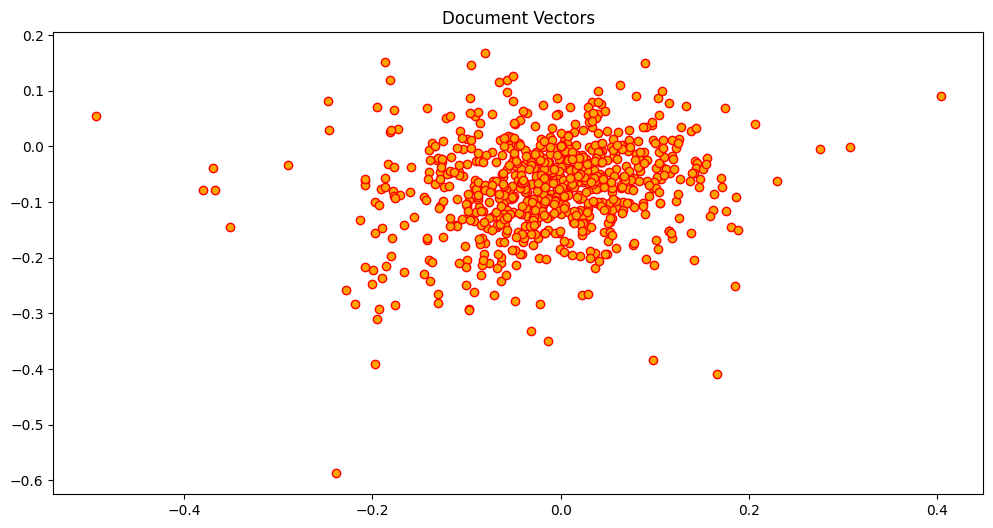

In [ ]:
doc_glove_vectors = np.array(
    [np.mean([embeddiing_matrix[word2id[w]] for w in doc.split() if w in word2id], axis=0) for doc in df['clean_sentence']]
)

doc_glove_vectors.shape


import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.figure(figsize=(12, 6))
plt.scatter(doc_glove_vectors[:, 0], doc_glove_vectors[:, 1], c="orange", edgecolors="r")
plt.title("Document Vectors")

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=["ClusterLabel"])
pd.concat([df, cluster_labels], axis=1)

In [ ]:
import spacy

nlp = spacy.load("../Projek UTS PBA_A_JAWA KRAMA LUGU/id_nusantara-1.0/id_nusantara")


unique_words = list(
    set([word for sublist in [doc.split()
        for doc in df["clean_sentence"]] for word in sublist])
)

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
pd.DataFrame(word_glove_vectors, index=unique_words)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
prestige,-3.903384,3.149041,-1.716982,1.881318,3.967285,-1.876696,-9.506919,1.065360,0.854943,-0.969437,...,-5.311656,2.117092,-2.980218,0.503972,1.907256,-0.159552,-1.378395,-1.648916,7.217773,-0.644501
berkelilingkeliling,-0.025624,-1.504803,1.336309,0.726905,0.940716,-3.686836,3.982671,8.474461,3.793552,-0.331172,...,-2.515980,-6.756740,-2.344826,3.433048,-3.399727,1.039519,-0.654961,2.429319,1.267686,0.637729
gantos,-2.460443,-2.065145,-3.338428,-0.025054,2.813809,-1.588527,3.647892,1.775608,5.174606,1.811408,...,-1.295907,-5.624028,-2.381710,-1.292627,-3.147270,2.781204,3.169234,-5.940231,0.006283,-1.904263
matur,-0.276509,-2.049221,-0.765472,-1.363276,3.048589,-2.026029,1.580990,3.861832,4.681074,-1.552014,...,-0.488217,-6.653522,-1.737308,5.474938,-3.571921,4.626414,1.439809,-4.103945,0.216933,-0.138797
pilih,-4.725470,0.456731,2.653116,0.557096,2.974967,-0.439107,-2.467705,0.511362,0.064341,-2.802476,...,-2.376145,-3.908863,-1.914635,2.066135,-0.653582,-0.184997,-2.154729,-1.287290,4.788778,0.690576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
helm,1.960638,-6.744467,2.386520,-0.925659,1.264621,-0.951080,9.109558,4.732787,-2.279950,-3.668192,...,-2.478864,-6.515910,-1.219734,2.160907,-2.223444,3.107597,5.987000,-6.381341,2.379983,0.804611
baleno,-3.817684,-3.412411,-1.015194,1.965041,1.922328,-3.611062,6.463936,4.563296,6.791223,1.227871,...,-2.648546,-2.819972,-4.639724,-2.273771,-5.507673,0.622100,0.064368,-1.175568,1.046581,-0.212757
kopi,-1.858495,0.405081,-0.810777,-2.767774,2.349434,0.284823,-3.006376,3.206239,5.558224,-0.781270,...,-4.788136,-1.875580,-3.083569,1.288273,-3.405827,2.177441,-4.240293,-0.788857,3.172091,-2.508128
abangabang,1.529336,-2.813733,-0.087499,-0.888788,3.359485,-1.919631,2.597854,6.597711,4.059123,-1.887247,...,-4.286185,-4.612117,-2.912968,-1.190249,-4.924544,0.981899,-6.589237,0.913293,2.558092,0.111135


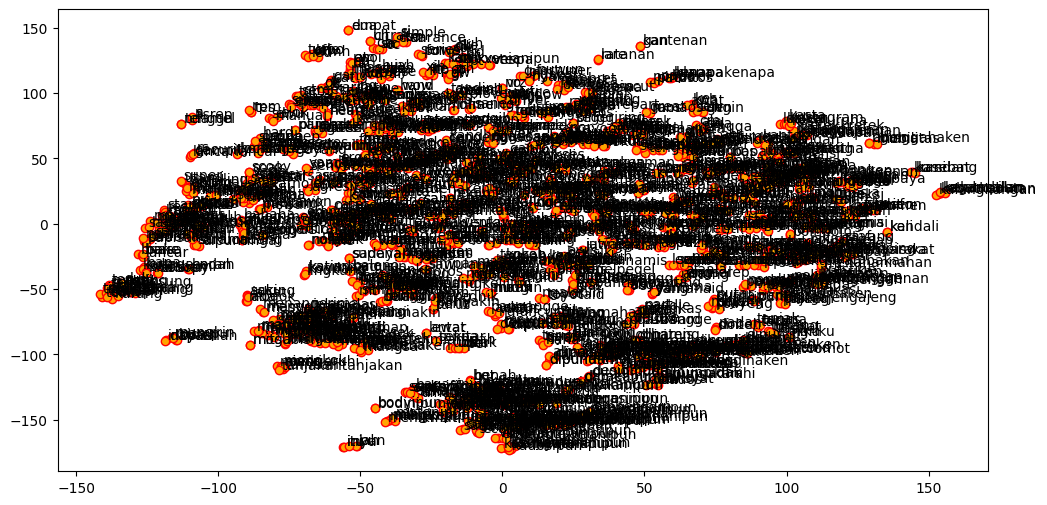

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c="orange", edgecolors="r")
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x + 1, y + 1), xytext=(0, 0),
                 textcoords="offset points")

In [ ]:
doc_glove_vectors = np.array(
    [nlp(str(doc)).vector for doc in df["clean_sentence"]])

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=["ClusterLabel"])
pd.concat([df, cluster_labels], axis=1)

,original,translated,fuel,machine,others,part,price,service,clean_sentence,ClusterLabel
0,Saya memakai Honda Jazz GK5 tahun 2014 ( pertama meluncur ) . Mobil nya bagus dan enak sesuai moto nya menyenangkan untuk dikendarai,kula ngangge honda jazz GK5 warsa 2014 ( pertami ngluncur ) . mobilipun sae lan eca cocog motonipun ngremenaken kangge dikendarai,neutral,neutral,positive,neutral,neutral,neutral,kula ngangge honda jazz gk warsa tam ngluncur mobil sae lan eca cocog motonipun ngremenaken kangge kendara,1
1,Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setengah saja .,avanza kenging punapa dados boros bensin kados puniki empun ah. enggal dipunisi sampun badhe sapalih mawon .,negative,neutral,neutral,neutral,neutral,neutral,avanza kenging punapa dados boros bensin kados puniki empun ah enggal dipunisi sampun badhe sapalih mawon,0
2,"saran ku dan pengalaman ku , mending beli mobil niaga L300 atau canter . irit dan bandel .","saran kula lan pengalaman kula , mending tumbas mobil niaga l300 utawi canter . irit lan bandel .",positive,positive,neutral,neutral,neutral,neutral,saran kula lan alam kula mending tumbas mobil niaga l utawi canter irit lan bandel,1
3,Dari segi harga juga pajero lebih mahal 30 jutaan dibanding fortuner,saking segi regi ugi pajero langkung awis 30 jutaan dipunbanding fortuner,neutral,neutral,neutral,neutral,positive,neutral,saking segi regi ugi pajero langkung awis juta dipunbanding fortuner,2
4,Kalo menurut gw enak pajero si,menawi midherek gw eca pajero si,neutral,neutral,positive,neutral,neutral,neutral,menawi midherek gw eca pajero si,1
...,...,...,...,...,...,...,...,...,...,...
805,Naik pajero goyang nya parah mending naik inova,minggah pajero goyangipun jahat mending minggah inova,neutral,neutral,positive,neutral,neutral,neutral,minggah pajero goyang jahat mending minggah inova,0
806,pengalaman berkendara nya sangat menyenangkan pakai Avanza karena suara mesin nya yang halus,pengalaman berkendaranipun ngremenaken sanget angge avanza amargi suwanten mesinipun ingkang lembat,neutral,positive,neutral,neutral,neutral,neutral,alam berkendaranipun ngremenaken sanget angge avanza amargi suwanten mesin ingkang lembat,2
807,"agya agak sedikit mengecewakan, gak bagus",agya radi sakedhik nguciwakaken,neutral,neutral,negative,neutral,neutral,neutral,agya radi sakedhik nguciwakaken,2
808,Di samping harga nya yang terjangkau motor matic vario irit bahan bakar dan nyaman untuk digunakan dalam melaksanakan kegiatan sehari-hari .,ing sisi reginipun ingkang terjangkau motor matic vario irit bahan besmi lan nyaman kangge dipunangge lebet nglampahaken kegiatan sadinten-dinten .,positive,neutral,positive,neutral,positive,neutral,ing sisi reginipun ingkang jangkau motor matic vario irit bahan besmi lan nyaman kangge dipunangge lebet nglampahaken giat sadintendinten,0


In [ ]:
from gensim.models.fasttext import FastText

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in df["clean_sentence"]]

feature_size = 100  
window_context = 50  
min_word_count = 5  
sample = 1e-3 


ft_model = FastText(
    sentences=tokenized_corpus, 
    vector_size=feature_size,  
    window=window_context, 
    min_count=min_word_count, 
    sample=sample,  
    epochs=50,  
)

In [ ]:
similar_words = {
    search_term: [item[0] for item in ft_model.wv.most_similar([search_term], topn=5)]
    for search_term in [
    "avanza",
    "mobil",
    "toyota",
    "sae",
    "kijang",
    
    ]
}
similar_words

{'avanza': ['juragan', 'ketingal', 'mobilio', 'interior', 'kaliyan'],
 'mobil': ['kaliyan', 'kelas', 'kelasi', 'mpv', 'keluwargi'],
 'toyota': ['ramah', 'daihatsu', 'biaya', 'nik', 'saya'],
 'sae': ['saha', 'saderengipun', 'saya', 'saestu', 'sampeyan'],
 'kijang': ['yang', 'ruang', 'barang', 'stabil', 'tumpang']}

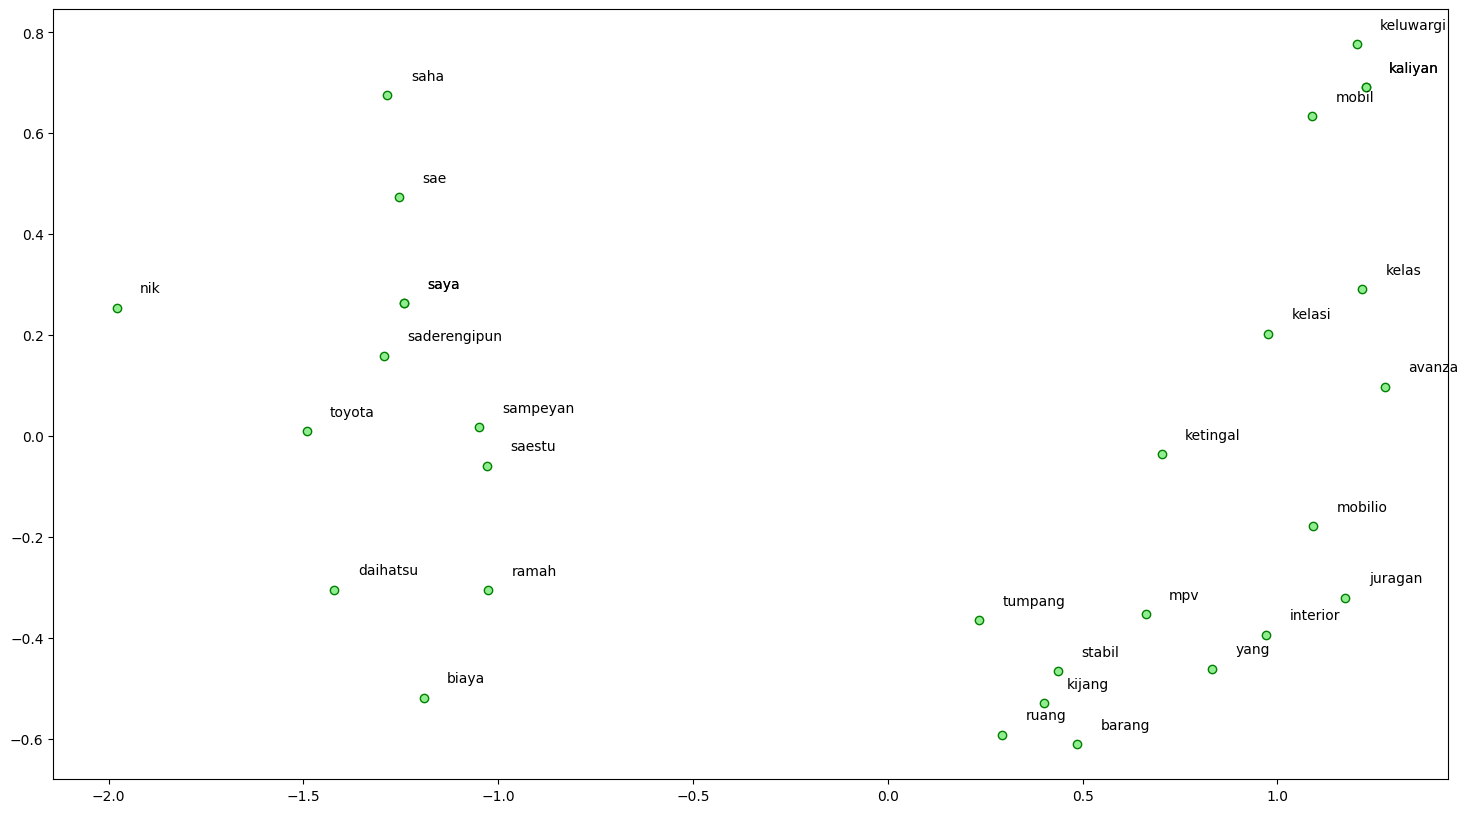

In [ ]:
from sklearn.decomposition import PCA

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = ft_model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(18, 10))
plt.scatter(P[:, 0], P[:, 1], c="lightgreen", edgecolors="g")
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(
        label, xy=(x + 0.06, y + 0.03), xytext=(0, 0), textcoords="offset points"
    )

In [ ]:
ft_model.wv["avanza"]

array([ 0.0796933 ,  0.24677272, -0.36754587, -0.24873711,  0.22768794,
       -0.00192201,  0.07535166, -0.01166224,  0.22173287, -0.3163375 ,
       -0.27464765,  0.07779423, -0.08978823,  0.3272639 ,  0.04542214,
        0.02149064,  0.28112143, -0.31355485, -0.07505009, -0.09505139,
       -0.44671425, -0.18490732, -0.6437464 ,  0.6047528 , -0.44929448,
       -0.21073352,  0.16198312,  0.01303593, -0.11537413,  0.2589664 ,
        0.17285226,  0.22560196, -0.16356437, -0.2788478 , -0.00433922,
        0.32824525,  0.4769681 ,  0.04985715,  0.00516764, -0.41991243,
        0.27167973,  0.15712023, -0.00441338,  0.30732298,  0.06033618,
        0.05276902, -0.7216205 ,  0.17351504, -0.0197282 , -0.26809162,
       -0.47316977, -0.23377168, -0.20702168,  0.2599346 ,  0.14583474,
        0.13119195,  0.03471972,  0.0046873 , -0.04316613,  0.00863704,
        0.08267977, -0.11600745, -0.28274798,  0.21884112, -0.31614867,
        0.380765  ,  0.55676126,  0.07431313, -0.11214235,  0.10

In [ ]:
print(ft_model.wv.similarity(w1="avanza", w2="toyota"))
print(ft_model.wv.similarity(w1="kijang", w2="toyota"))

0.33380744
0.5087691


In [ ]:
st1 = "kijang avanza spacy"
st2 = "mobil toyota sae sanget"
st3 = "mobil avanza mirah sanget"

print("kata berbeda[", st1, "]:", ft_model.wv.doesnt_match(st1.split()))

kata berbeda[ kijang avanza spacy ]: spacy


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [ ]:
train_data = pd.read_csv('train_preprocess.csv') 
val_data = pd.read_csv('valid_preprocess.csv') 
test_data = pd.read_csv('test_preprocess.csv') 
print('Train Data:', train_data.shape) 
print('validation Data:', val_data.shape)
print('Test Data:', test_data.shape) 

In [ ]:
train_data.head() 

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('','',string.punctuation))
    text = text.strip()
    return text

train_data['clean_text'] = train_data['translated'].apply(clean_text)
val_data['clean_text'] = val_data['translated'].apply(clean_text)
test_data['clean_text'] = test_data['translated'].apply(clean_text)

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
labels = ['fuel','machine','others','part','price','service',]

train_encoded = pd.get_dummies(train_data, columns = labels, dtype=int)
val_encoded = pd.get_dummies(val_data, columns=labels, dtype=int)
test_encoded = pd.get_dummies(test_data, columns=labels, dtype=int)

train_encoded.head()

In [ ]:
label_columns = ['fuel_negative','fuel_neutral','fuel_positive','machine_negative','machine_neutral','machine_positive',]


y_train_multi = train_encoded[label_columns]
y_val_multi = val_encoded[label_columns]
y_test_multi = test_encoded[label_columns]

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import ClassifierChain, BinaryRelevance
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000)  # Atur jumlah fitur sesuai kebutuhan

# Transformasi teks menjadi fitur numerik menggunakan TF-IDF
X_train_tfidf = vectorizer.fit_transform(train_data['clean_text'])
X_val_tfidf = vectorizer.transform(val_data['clean_text'])
X_test_tfidf = vectorizer.transform(test_data['clean_text'])

# Menyimpan hasil training dan metrics
metrics_df = pd.DataFrame(columns=["Model", "Technique", "Accuracy", "F1-Score", "Precision", "Recall"])

# Inisialisasi model dan teknik problem transformation
models = [
    ("Naive Bayes", MultinomialNB(), "Binary Relevance", BinaryRelevance(MultinomialNB())),
    ("Logistic Regression", LogisticRegression(max_iter=1000), "Binary Relevance", BinaryRelevance(LogisticRegression(max_iter=1000))),
    ("Naive Bayes", MultinomialNB(), "Classifier Chains", ClassifierChain(MultinomialNB())),
    ("Logistic Regression", LogisticRegression(max_iter=1000), "Classifier Chains", ClassifierChain(LogisticRegression(max_iter=1000)))
]

# Cross-validation dan metric collection
for model_name, model, technique_name, technique in models:
    print(f"Training {model_name} with {technique_name}...")
    
    # Fit model menggunakan cross-validation
    technique.fit(X_train_tfidf, y_train_multi)
    
    # Prediksi pada validation set
    y_pred = technique.predict(X_val_tfidf)
    
    # Menghitung accuracy secara manual
    accuracy = accuracy_score(y_val_multi, y_pred)
    
    # Menyimpan classification report
    class_report = classification_report(y_val_multi, y_pred, output_dict=True, zero_division=1)
    
    # Extracting metrics from the classification report
    f1_score = class_report['weighted avg']['f1-score']
    precision = class_report['weighted avg']['precision']
    recall = class_report['weighted avg']['recall']
    
    # Menyimpan metrics ke dataframe
    metrics_row = {
        "Model": model_name,
        "Technique": technique_name,
        "Accuracy": accuracy,
        "F1-Score": f1_score,
        "Precision": precision,
        "Recall": recall
    }
    
    metrics_df = pd.concat([metrics_df, pd.DataFrame([metrics_row])], ignore_index=True)

metrics_df


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk evaluasi model
def evaluate_model(model_name, technique_name, technique, X_test_tfidf, y_test_multi):
    print(f"Evaluating {model_name} with {technique_name} on test data...")
    
    # Prediksi pada test set (transformasi data test menggunakan vectorizer terlebih dahulu)
    y_pred_test = technique.predict(X_test_tfidf)
    
    # Menghitung accuracy
    accuracy = accuracy_score(y_test_multi, y_pred_test)
    
    # Menampilkan classification report
    class_report = classification_report(y_test_multi, y_pred_test, output_dict=True, zero_division=1)
    
    # Menyimpan classification report
    print("Classification Report:")
    print(class_report)
    
    # Menyimpan confusion matrix
    cm = multilabel_confusion_matrix(y_test_multi, y_pred_test)
    print("Confusion Matrix:")
    print(cm)
    
    # Visualisasi confusion matrix
    for i, label in enumerate(y_test_multi.columns):
        cm_label = cm[i]
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm_label, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred Neg', 'Pred Pos'], yticklabels=['True Neg', 'True Pos'])
        plt.title(f"Confusion Matrix for {label}")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
    return accuracy, class_report, cm

# Evaluasi semua model yang sudah dilatih
results_df = pd.DataFrame(columns=["Model", "Technique", "Accuracy", "F1-Score", "Precision", "Recall"])

for model_name, model, technique_name, technique in models:
    # Evaluasi model pada data test
    accuracy, class_report, cm = evaluate_model(
        model_name, technique_name, technique, X_test_tfidf, y_test_multi
    )

    # Extracting metrics from classification report
    f1_score = class_report['weighted avg']['f1-score']
    precision = class_report['weighted avg']['precision']
    recall = class_report['weighted avg']['recall']

    # Menyimpan hasil ke dalam dataframe
    metrics_row = {
        "Model": model_name,
        "Technique": technique_name,
        "Accuracy": accuracy,
        "F1-Score": f1_score,
        "Precision": precision,
        "Recall": recall
    }

    results_df = pd.concat([results_df, pd.DataFrame([metrics_row])], ignore_index=True)

# Menampilkan hasil akhir
print("Final Evaluation Metrics:")
print(results_df)
